# Multiple Inputs

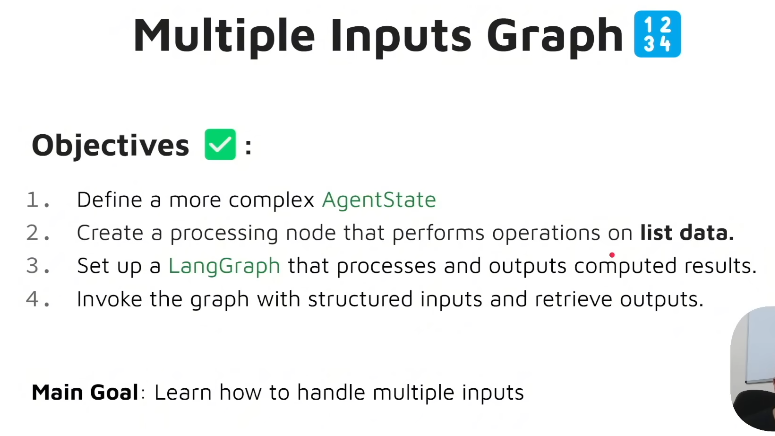

In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 

In [3]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str


In [4]:
def process_values(state: AgentState) -> AgentState:
    """" This function process handles multiple different inputs """

    state["result"] = f"Hi there slayqueen {state['name']} heres ur sum = {sum(state['values'])}"
    return state

In [5]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

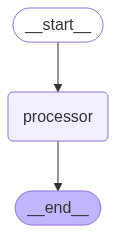

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

Despite not having "result" passed in our state, it works - and that's okay. As long as you know that state initially is None and you can't use it to update itself or something else

In [9]:
answers = app.invoke({"values": [1,2,3,4], "name": "sewgi"})

In [10]:
print(answers["result"])

Hi there slayqueen sewgi heres ur sum = 10
